# Hồi quy Logistic
Hãy tưởng tượng ra một công ty ô tô yêu thích và bạn là nhà khoa học dữ liệu cho công ty đó. Và nhiệm vụ của bạn là dự đoán khách hàng nào trong số các khách hàng trước đây sẽ mua một chiếc SUV đẹp, hoàn toàn mới vừa được tạo ra bởi hãng xe yêu thích của bạn.

## Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import tập dữ liệu

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Chia tập dữ liệu thành Training set và Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Scaling

Bây giờ, chúng ta có thể chuyển sang bước tiếp theo: feature scaling.

**Vậy tại sao chúng ta cần áp dụng các feature ở đây?**

Điều này thực sự không bắt buộc đối với hồi quy logistic. Tuy nhiên, nếu áp dụng nó sẽ giúp cải thiện hiệu suất huấn luyện và do đó cũng sẽ cải thiện các dự đoán cuối cùng. Vì vậy, bạn cần hiểu rằng đối với một số mô hình mà chúng ta có, feature scaling hoàn toàn là cần thiết. Tuy nhiên, đối với các mô hình khác như hồi quy logistic, nó không phải là một điều cần thiết. Tuy nhiên, nếu áp dụng nó sẽ cải thiện hiệu suất huấn luyện và các dự đoán cuối cùng. Nhưng bạn thực sự có thể triển khai tương tự mà không cần feature scaling.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

- Lý do mà dùng `fit_transform` cho dữ liệu training là vì: `fit_transform` là combo bao gồm 2 việc `fit` và `transform`.
`fit` dùng tính toán ra các tham số cho scalling, `transform` sẽ chuyển dữ liệu thành dữ liệu đã được scaling.
- Trong khi ấy, dữ liệu test sẽ được dùng các thông số scale trong trained model để scale.

Điều này là hoàn toàn dễ hiểu, vì những dữ liệu test là đại diện cho những dữ liệu mới, khi đưa vào dự đoán trong model, nó sẽ được scale đúng với những gì mà model đã train.

## Huấn luyện mô hình Hồi quy logistic trên Training set

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

## Dự đoán kết quả mới

Bài tập mà tôi muốn bạn làm là dự đoán quyết định mua hàng cho một kết quả duy nhất, quyết định mua hàng của một khách hàng. Quyết định của khách hàng đầu tiên trong test set mà bạn sẽ thấy là 30 tuổi và kiếm được mức lương ước tính là 87000 USD. Vì vậy, tôi muốn bạn lấy hai input là 30 tuổi và mức lương ước tính là 87000 USD. Và chúng tôi muốn bạn dự đoán xem liệu khách hàng này có mua hàng hay không. **(hãy nhớ chia tỷ lệ dữ liệu mới này bằng cách sử dụng *transform()*)**

In [7]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Dự đoán kết quả Test set 

Hãy đưa ra các dự đoán trên tập dữ liệu kiểm tra **(y_pred)** và so sánh nó với giá trị đúng **(y_test)**. Hãy nối các tập này thành một tập dữ liệu duy nhất.

In [8]:
y_pred = classifier.predict(X_test)

## Tạo ma trận nhầm lẫn (Confusion Matrix)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  2]
 [12 25]]


0.86

## Hiển thị kết quả Training set 

Vẽ các vùng dự đoán, do đó ranh giới dự đoán ở đây phân tách hai vùng. Tất cả các điểm đều là điểm quan sát khách hàng của bạn. Và tất cả các điểm quan sát trong vùng màu xanh lá cây này là dự đoán mua SUV vì vùng màu xanh lá ở đây đại diện cho dự đoán là 1. Và vùng màu đỏ được dự đoán là 0, có nghĩa là tất cả những khách hàng được dự đoán sẽ không mua chiếc SUV nào.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


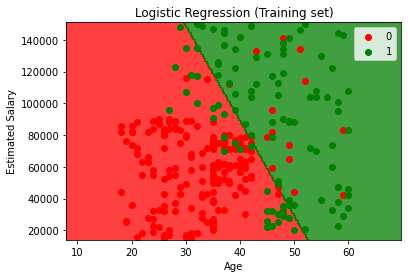

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train # convert back to original scale
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25), 
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Hiển thị kết quả Test set 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


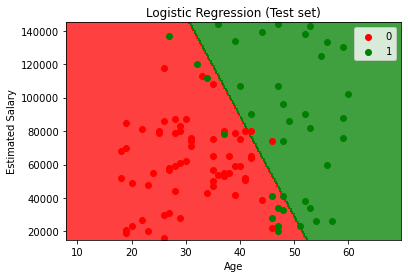

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()